In [47]:
import os
os.chdir("Y:\Python\Mega_IT\F.Machine_Learning/1.Supervised_Learning/5.Decision_Tree")
os.getcwd()

'Y:\\Python\\Mega_IT\\F.Machine_Learning\\1.Supervised_Learning\\5.Decision_Tree'

In [2]:
import sys
sys.path.append("Y:\Python\Mega_IT")

import warnings
warnings.filterwarnings('ignore')

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

In [4]:
origin1 = pd.read_excel("./data/breast-cancer-wisconsin.xlsx")

In [5]:
origin1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = None, encoder = 'o', scaler = None)

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 처리하지 않음 |
| 스케일러    | 처리하지 않음 |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [7]:
df1_p = pp.fit_transform(origin1, yname = 'diagnosis', ylabeling = True)

데이터프레임 크기 : (569, 32)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], 총 31개
종속변수 컬럼명 : diagnosis / 종속변수 라벨링 여부 : True


In [9]:
x_train, x_test, y_train, y_test = my_train_test_split(df1_p, yname = 'diagnosis', test_size = 0.3, random_state = 0)

In [10]:
support = YjkClassifierSupport()

사용 가능한 모델 : ['LogisticRegression', 'SGDClassifier', 'KNeighborsClassifier', 'LinearSVC', 'SVC', 'GaussianNB', 'DecisionTreeClassifier', 'CatboostClassifier']


In [11]:
model = support.call_model('DecisionTreeClassifier')

[DecisionTreeClassifier의 파라미터]
+-------------------+---------------------------------------------------------------------------------+-----------------------------+
| 파라미터명        | 파라미터 노트                                                                   | 파라미터 범위               |
|-------------------+---------------------------------------------------------------------------------+-----------------------------|
| criterion         | 노드 분할의 기준, gini는 지니 불순도, entropy는 정보 이득을 사용                | ['gini', 'entropy']         |
| splitter          | 각 노드에서 분할을 선택하는 방식, best는 최선의 분할을 찾으며 random은 무작위   | ['best', 'random']          |
| max_depth         | 나무의 깊이                                                                     | [None, 3, 5, 7, 10, 20, 30] |
| min_samples_split | 노드를 분할하기 위한 최소 샘플 수, 갚이 클수록 분할이 적게 일어나 모델이 단순화 | [2, 5, 10]                  |
| min_samples_leaf  | 리프 노드가 되기 위한 최소 샘플 수, 값이 클수록 모델이 단순하고 과적합이 방지됨 | [1, 2, 4]                   |
| max_features      | 최적의 분할을 찾기 위

In [15]:
grid = GridSearchCV(model, param_grid = support.get_params(), n_jobs = -1)

In [16]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [17]:
best_model = grid.best_estimator_

In [18]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [20]:
params = support.get_params()

[criterion 파라미터, 기존값 : entropy]


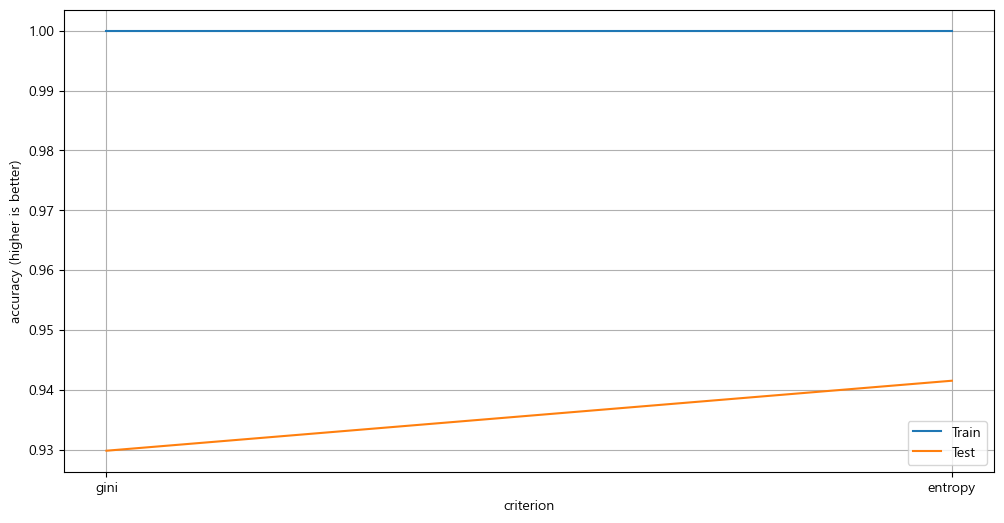

+-------------+---------------+---------------+-----------+
| criterion   |   훈련 데이터 |   검증 데이터 | Min-Max   |
|-------------+---------------+---------------+-----------|
| gini        |             1 |      0.929825 | 최소값    |
| entropy     |             1 |       0.94152 | 최대값    |
+-------------+---------------+---------------+-----------+

[splitter 파라미터, 기존값 : best]


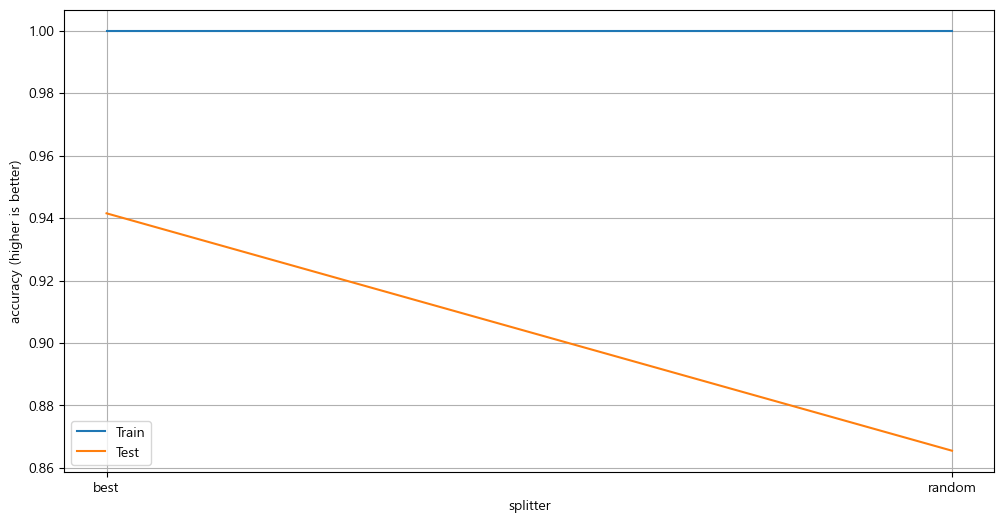

+------------+---------------+---------------+-----------+
| splitter   |   훈련 데이터 |   검증 데이터 | Min-Max   |
|------------+---------------+---------------+-----------|
| best       |             1 |       0.94152 | 최대값    |
| random     |             1 |      0.865497 | 최소값    |
+------------+---------------+---------------+-----------+

[max_depth 파라미터, 기존값 : None]


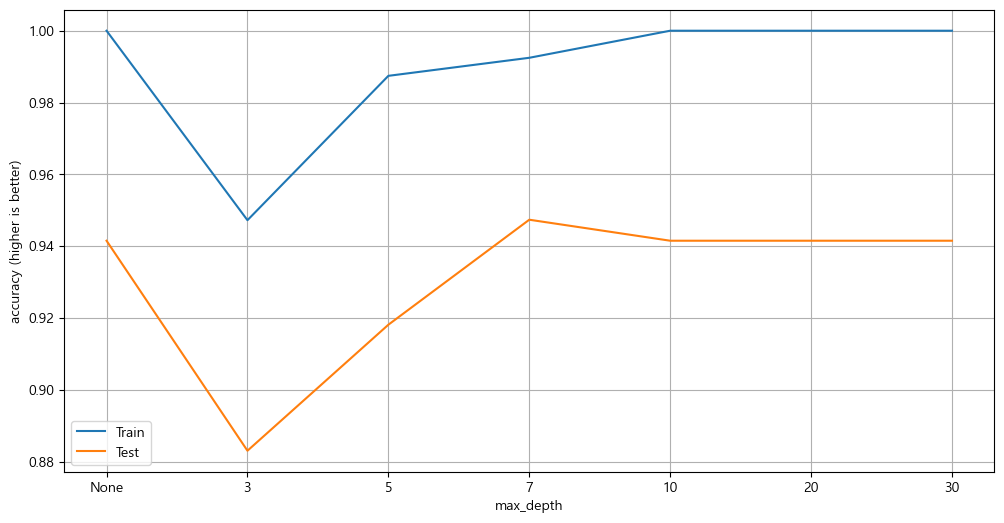

+-------------+---------------+---------------+-----------+
|   max_depth |   훈련 데이터 |   검증 데이터 | Min-Max   |
|-------------+---------------+---------------+-----------|
|         nan |             1 |       0.94152 |           |
|           3 |      0.947236 |      0.883041 | 최소값    |
|           5 |      0.987437 |      0.918129 |           |
|           7 |      0.992462 |      0.947368 | 최대값    |
|          10 |             1 |       0.94152 |           |
|          20 |             1 |       0.94152 |           |
|          30 |             1 |       0.94152 |           |
+-------------+---------------+---------------+-----------+

[min_samples_split 파라미터, 기존값 : 2]


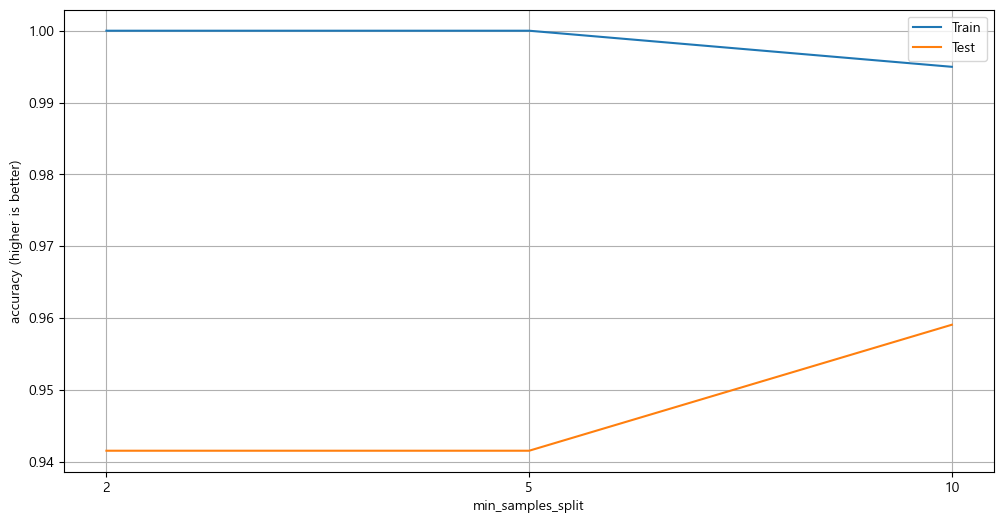

+---------------------+---------------+---------------+-----------+
|   min_samples_split |   훈련 데이터 |   검증 데이터 | Min-Max   |
|---------------------+---------------+---------------+-----------|
|                   2 |             1 |       0.94152 | 최소값    |
|                   5 |             1 |       0.94152 |           |
|                  10 |      0.994975 |      0.959064 | 최대값    |
+---------------------+---------------+---------------+-----------+

[min_samples_leaf 파라미터, 기존값 : 1]


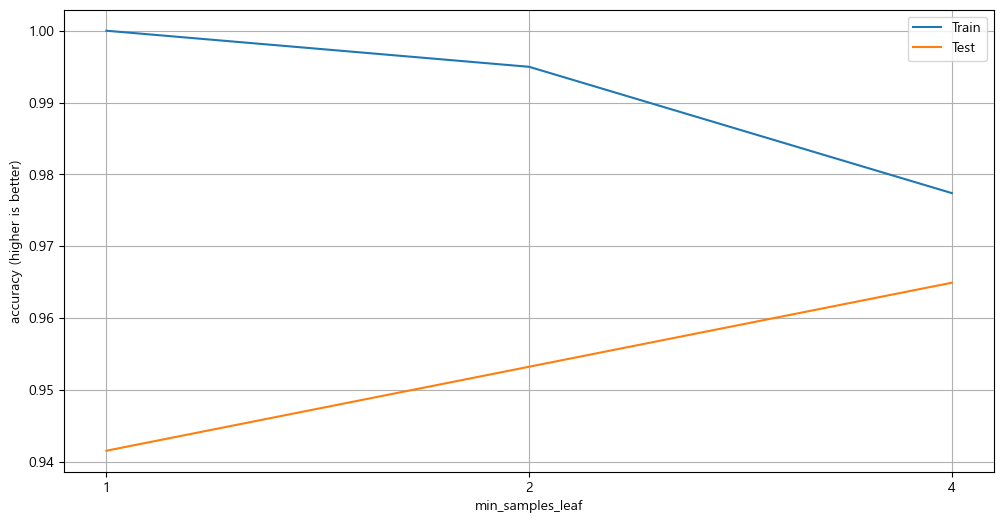

+--------------------+---------------+---------------+-----------+
|   min_samples_leaf |   훈련 데이터 |   검증 데이터 | Min-Max   |
|--------------------+---------------+---------------+-----------|
|                  1 |             1 |       0.94152 | 최소값    |
|                  2 |      0.994975 |      0.953216 |           |
|                  4 |      0.977387 |      0.964912 | 최대값    |
+--------------------+---------------+---------------+-----------+

[max_features 파라미터, 기존값 : sqrt]


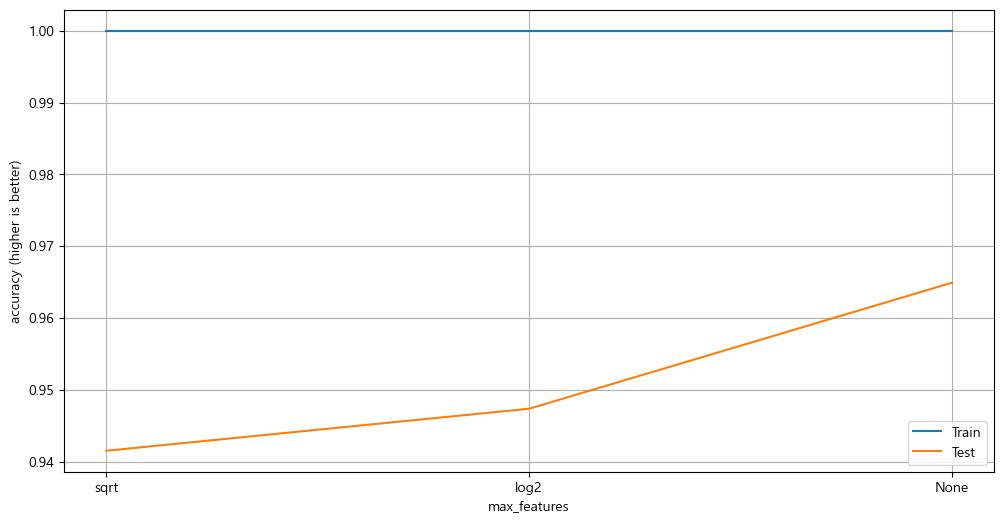

+----------------+---------------+---------------+-----------+
| max_features   |   훈련 데이터 |   검증 데이터 | Min-Max   |
|----------------+---------------+---------------+-----------|
| sqrt           |             1 |       0.94152 | 최소값    |
| log2           |             1 |      0.947368 |           |
|                |             1 |      0.964912 | 최대값    |
+----------------+---------------+---------------+-----------+



In [24]:
for i, v in enumerate(params.keys()):
    print(f"[{v} 파라미터, 기존값 : {grid.best_params_[v]}]")
    yjk_classification_param_plot(best_model, x_train, y_train, v, params[v], x_test = x_test, y_test = y_test, as_tabulate = True)
    print("")

- Pruning (가지치기)
    - dtree 객체의 cost_complexity_pruning_path() 메서드로 과정마다 효과적인 불순도 및 이를 위한 알파값을 반환함

In [33]:
dt = DecisionTreeClassifier(random_state = 0)
path = dt.cost_complexity_pruning_path(x_train, y_train)

In [34]:
path

{'ccp_alphas': array([0.        , 0.00249033, 0.00463858, 0.00487285, 0.00489632,
        0.00742172, 0.0080402 , 0.00838676, 0.00850406, 0.01386055,
        0.04035621, 0.33798172]),
 'impurities': array([0.        , 0.00996131, 0.01459989, 0.03409128, 0.04388392,
        0.05130564, 0.05934584, 0.0677326 , 0.07623666, 0.09009721,
        0.13045342, 0.46843514])}

In [36]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas, impurities)

[0.         0.00249033 0.00463858 0.00487285 0.00489632 0.00742172
 0.0080402  0.00838676 0.00850406 0.01386055 0.04035621 0.33798172] [0.         0.00996131 0.01459989 0.03409128 0.04388392 0.05130564
 0.05934584 0.0677326  0.07623666 0.09009721 0.13045342 0.46843514]


- 맨 앞의 값은 루트 노드 ~ 뒤로 갈수록 자식 노드

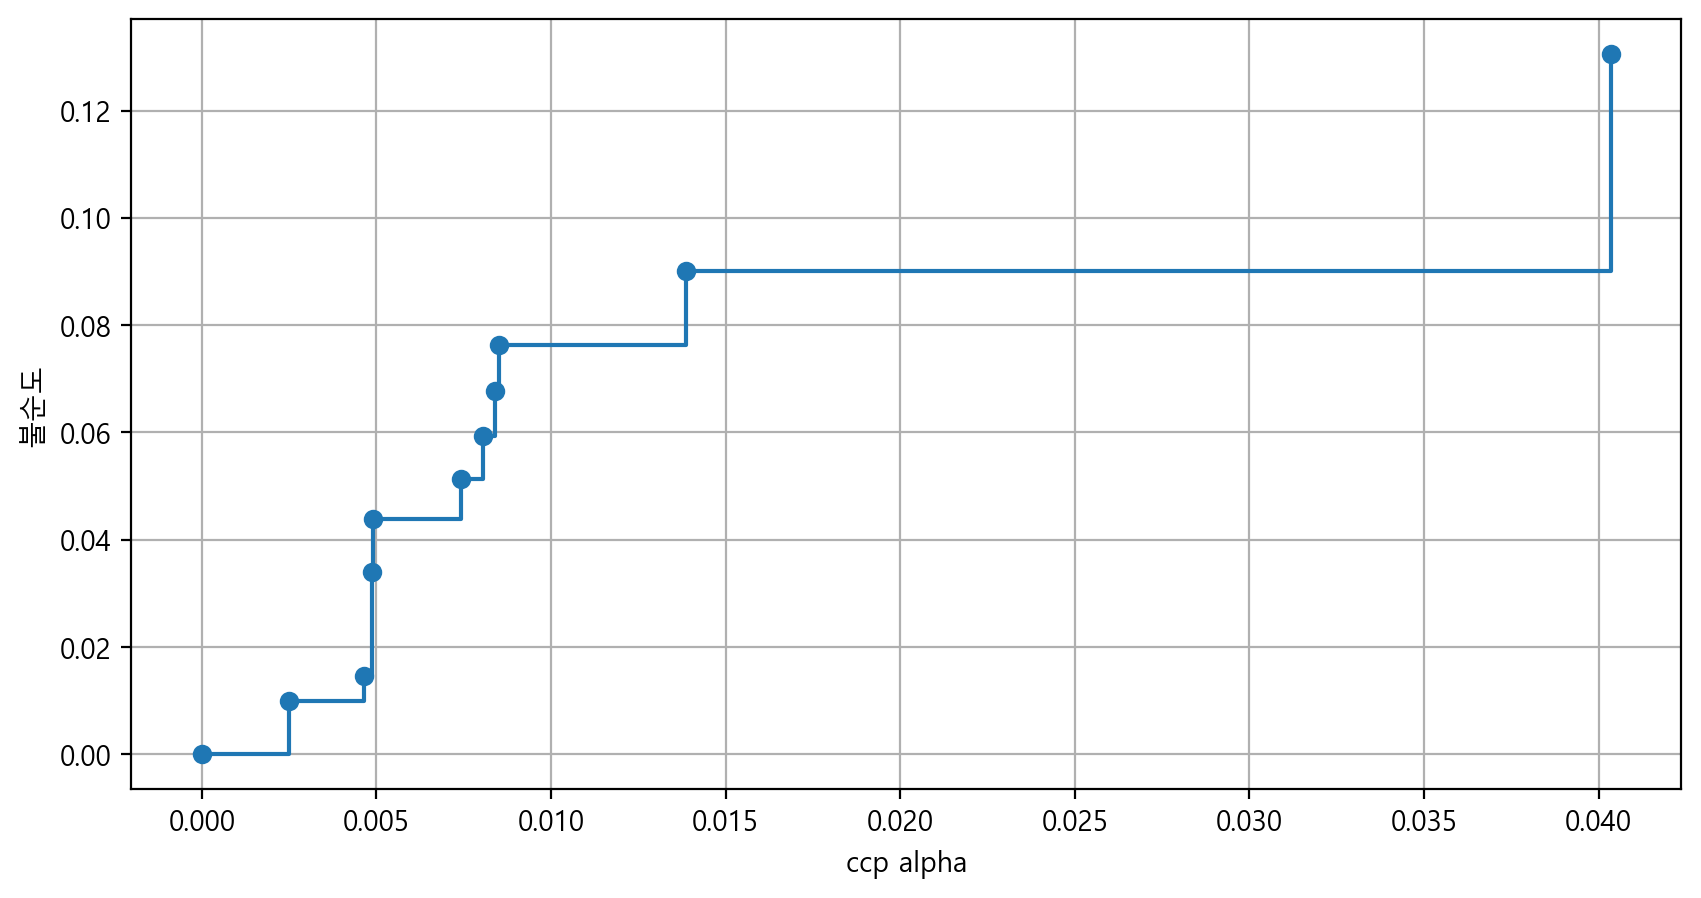

In [38]:
fig = plt.figure(figsize=(10, 5), dpi=200)
ax = fig.gca()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("ccp alpha")
ax.set_ylabel("불순도")
ax.grid()
plt.show()
plt.close()

- 알파값이 클수록 불순도는 높아짐, 최적의 정확도와 가장 낮은 알파값을 동시에 충족하는 모형을 찾아야 함
    - 알파값을 적용한 모델을 생성하여 노드의 수를 확인

In [39]:
# 의미 없는 양 끝의 값을 제외하고 알파값 목록을 생성
ccp_alphas = ccp_alphas[1:-1]
estimator_list = []

for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=1234, ccp_alpha=ccp_alpha)
    dtree.fit(x_train, y_train)

    # 분류기 객체를 리스트에 담는다.
    estimator_list.append(dtree)

# 각 분류기에 따른 트리의 노드 수 확인
t_nodes = [e.tree_.node_count for e in estimator_list]
t_nodes

[29, 27, 19, 15, 13, 11, 9, 7, 5, 3]

- 알파값에 의해 노드수가 점차 줄어듦, 노드 수가 지나치게 작을 경우 정확도는 떨어질것
    - 모델 성능이 가장 높은 알파값 중에서 적합한 알파값을 선택해야 함

[node_size: 29, ccp_alpha: 0.0025] ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.929825 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.869565 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.952381 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0833333 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.916667 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.909091 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.928351 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+------------------------

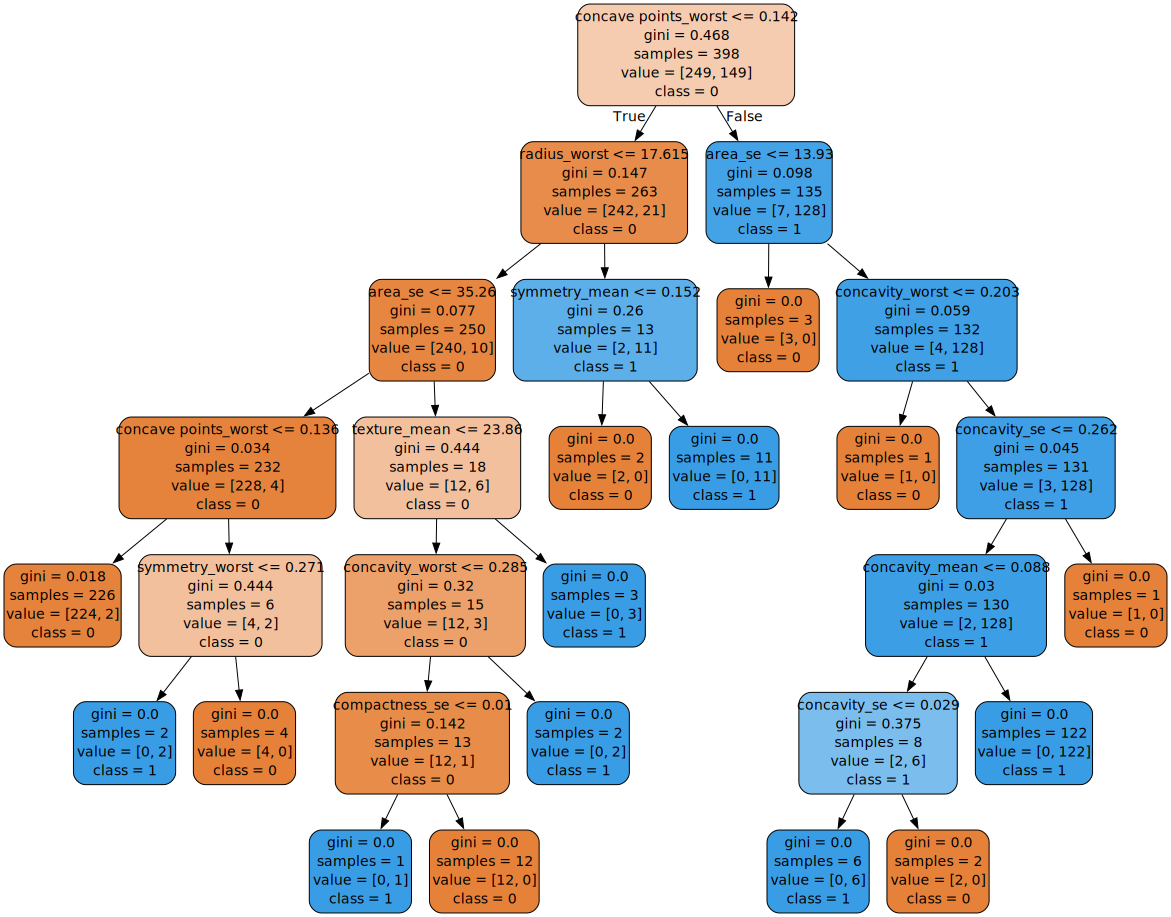












[node_size: 27, ccp_alpha: 0.0046] ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.929825 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.869565 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.952381 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0833333 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.916667 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.909091 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.927249 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+-------------

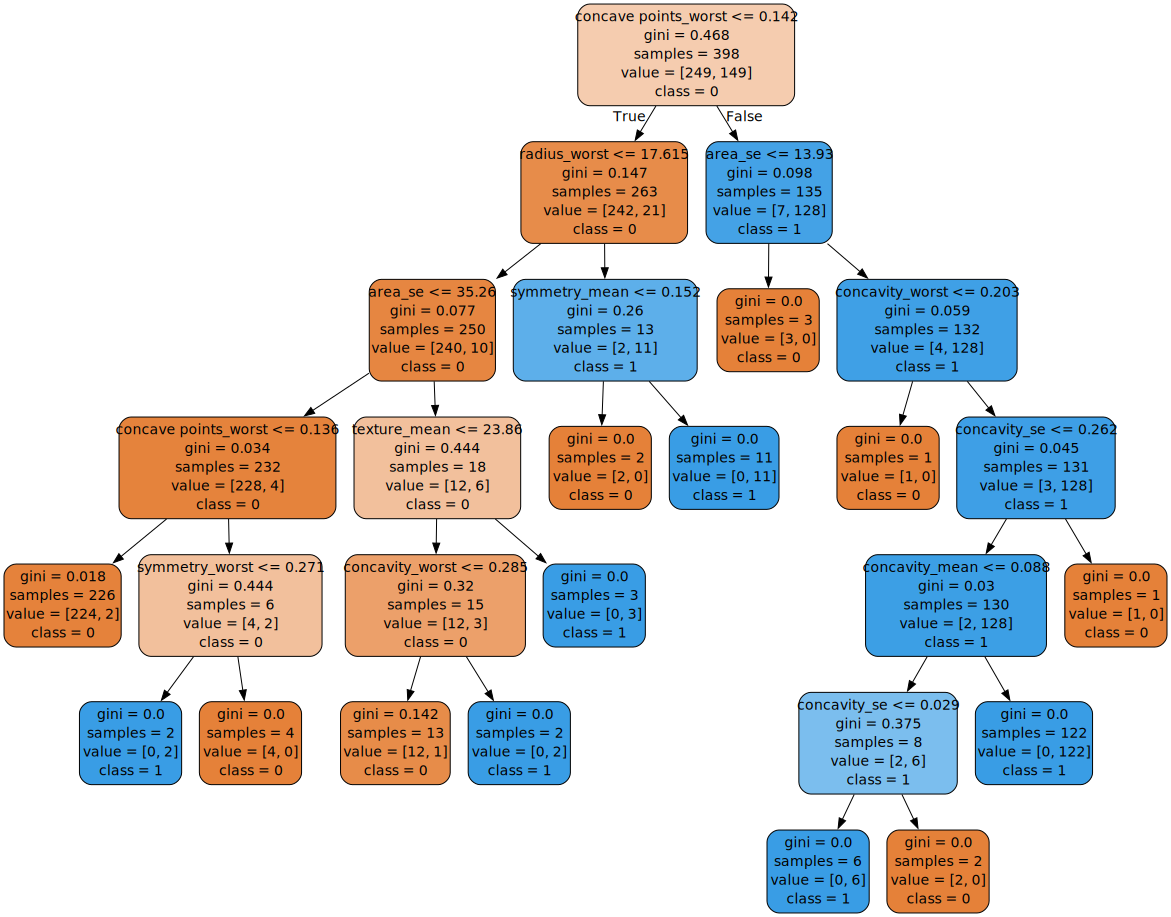












[node_size: 19, ccp_alpha: 0.0049] ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.923977 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.857143 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.952381 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0925926 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.907407 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.902256 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.907775 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+-------------

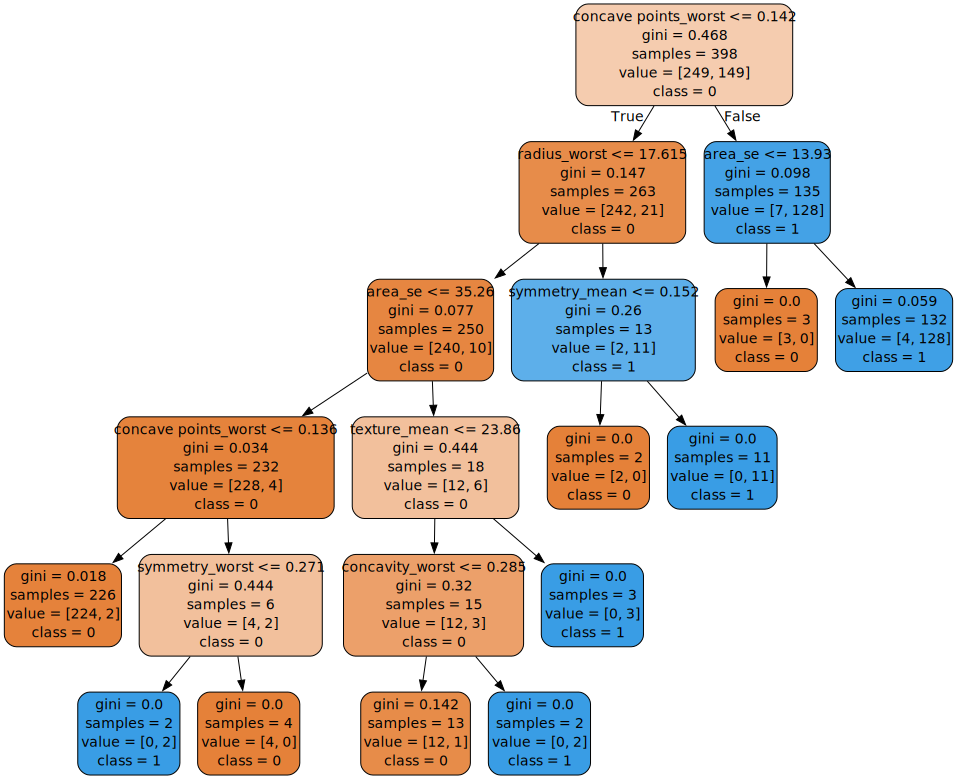












[node_size: 15, ccp_alpha: 0.0049] ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.929825 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.869565 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.952381 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0833333 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.916667 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.909091 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.915785 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+-------------

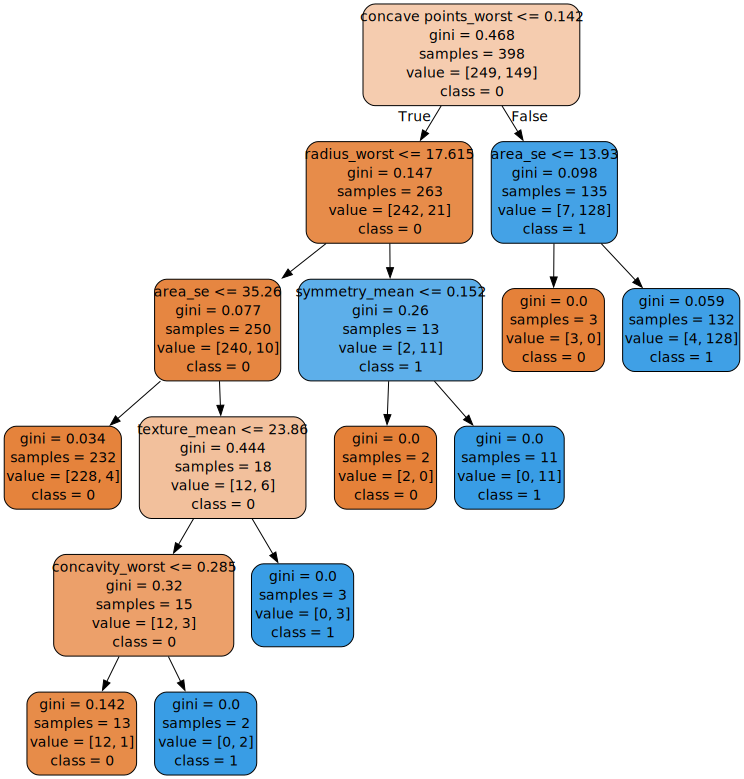












[node_size: 13, ccp_alpha: 0.0074] ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.929825 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.880597 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.936508 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0740741 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.925926 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.907692 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.922619 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+-------------

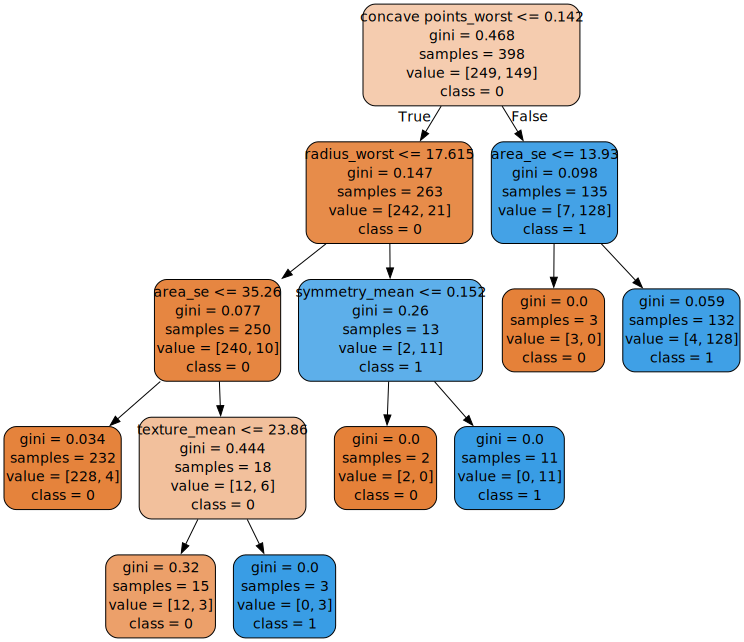












[node_size: 11, ccp_alpha: 0.0080] ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.929825 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.892308 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.920635 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0648148 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.935185 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |      0.90625 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.929453 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+-------------

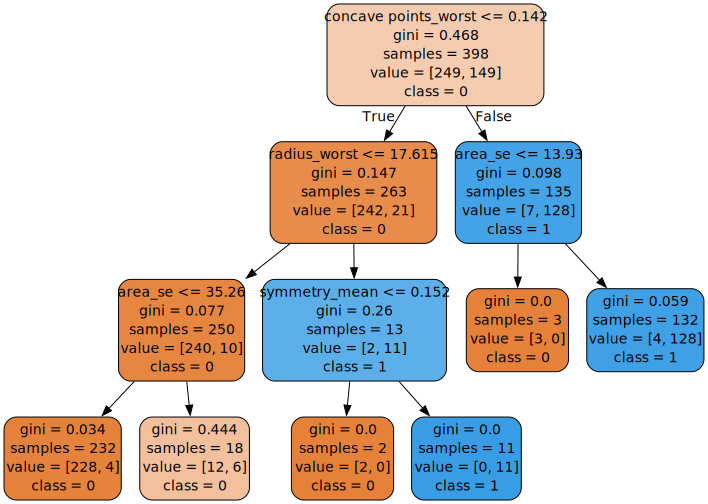












[node_size: 9, ccp_alpha: 0.0084] ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.929825 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.892308 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.920635 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0648148 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.935185 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |      0.90625 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.916079 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

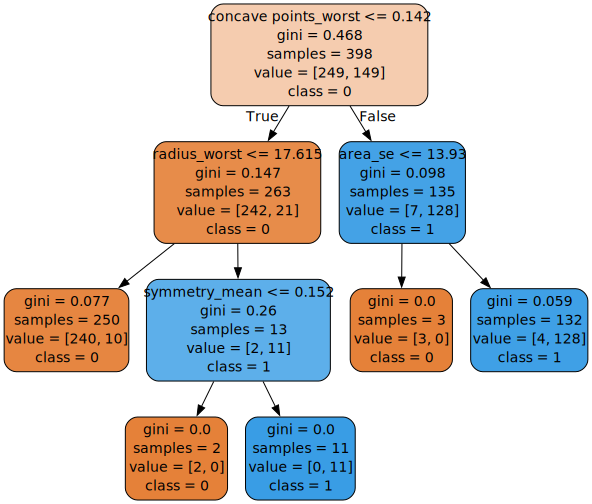












[node_size: 7, ccp_alpha: 0.0085] ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.935673 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.893939 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.936508 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0648148 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.935185 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.914729 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.939888 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

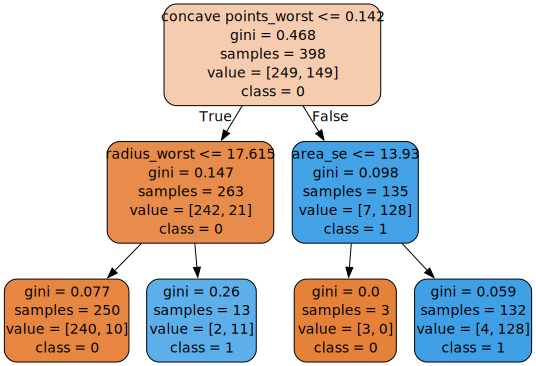












[node_size: 5, ccp_alpha: 0.0139] ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.935673 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.893939 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.936508 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0648148 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.935185 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.914729 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.939888 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

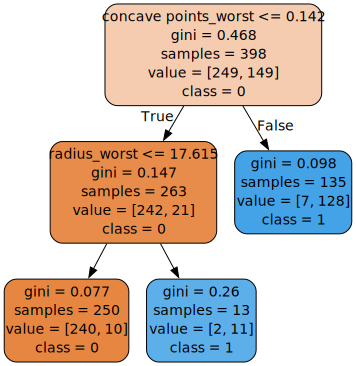












[node_size: 3, ccp_alpha: 0.0404] ================================================== 

[분류분석 성능평가]
+-------------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 | 설명                                                      |
|-------------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.894737 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.909091 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.793651 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0462963 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.953704 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.847458 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.873677 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+-------------------+--------------+--------------

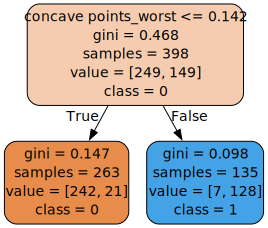

In [40]:
for i, v in enumerate(estimator_list):
    print("[node_size: {0}, ccp_alpha: {1:.4f}]".format(v.tree_.node_count, ccp_alphas[i]), "="*50, "\n")
    my_classification_result(v, x_test, y_test, hist=False, roc=False, pr=False, conf_matrix=False, learning_curve=False)
    print("\n" * 10)

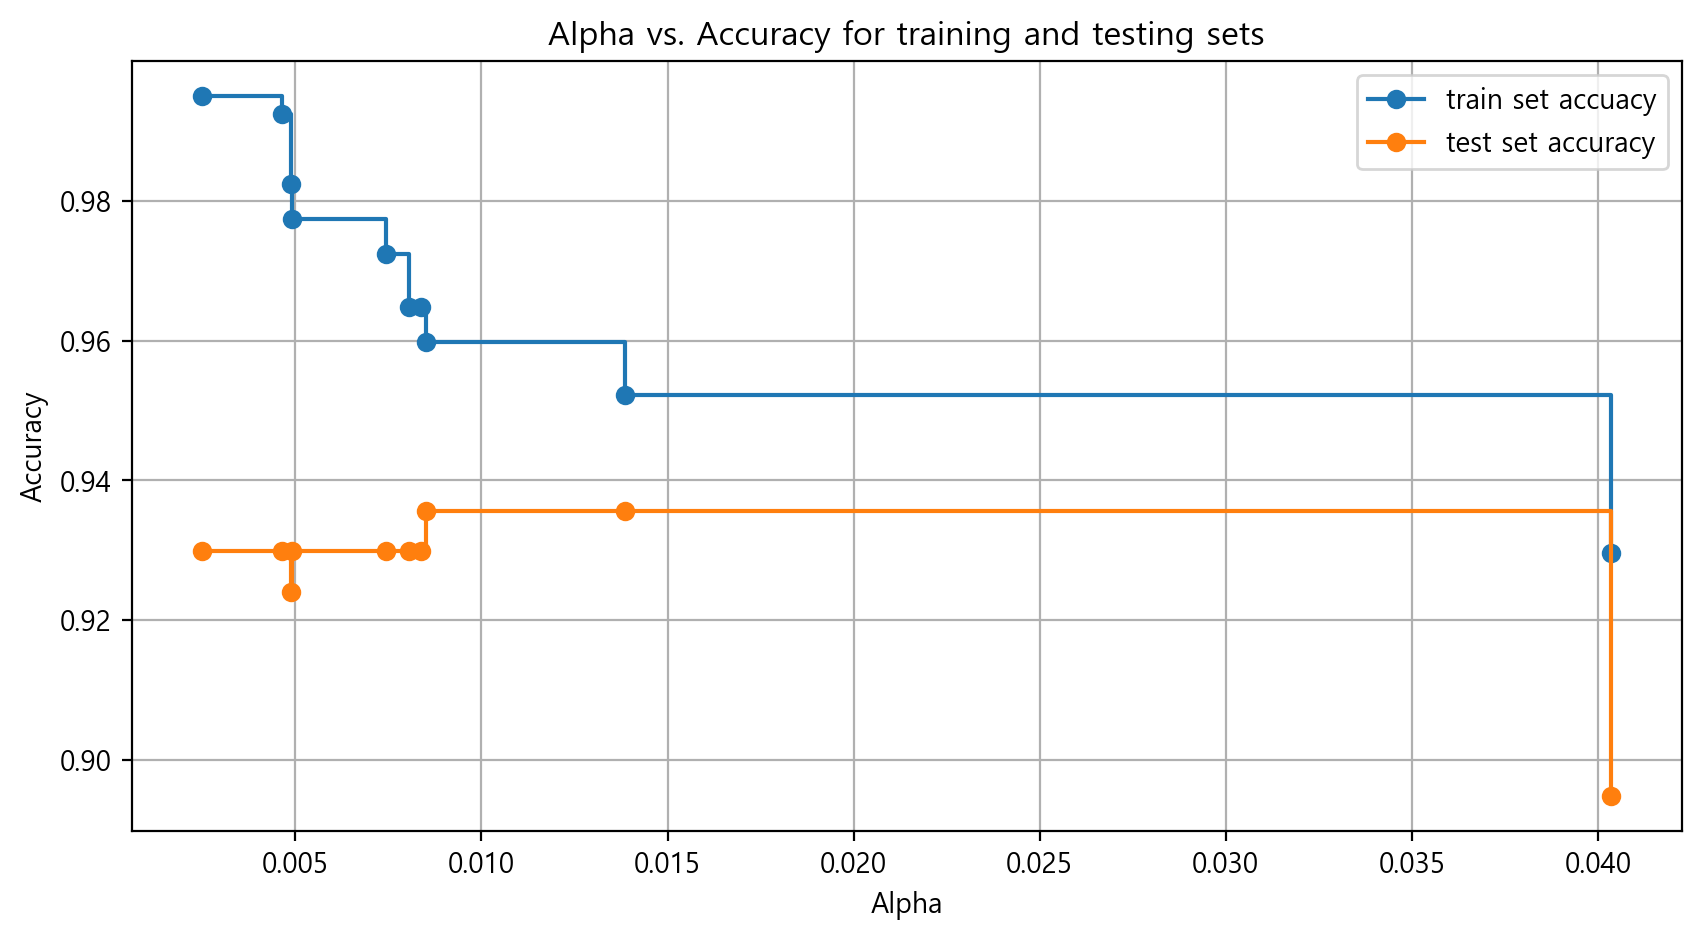

In [41]:
train_scores = []
test_scores = []

for v in estimator_list:
    train_scores.append(v.score(x_train, y_train))
    test_scores.append(v.score(x_test, y_test))

fig = plt.figure(figsize=(10, 5), dpi=200)
ax = fig.gca()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Alpha vs. Accuracy for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train set accuacy", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test set accuracy", drawstyle="steps-post")
ax.legend()
ax.grid()
plt.show()
plt.close()

In [42]:
df = DataFrame({"test acc": test_scores, "alpha":ccp_alphas})
df.sort_values(["test acc", "alpha"], ascending=[False, True], inplace=True)
df.reset_index(drop=True, inplace=True)
my_pretty_table(df)

+----+------------+------------+
|    |   test acc |      alpha |
|----+------------+------------|
|  0 |   0.935673 | 0.00850406 |
|  1 |   0.935673 |  0.0138605 |
|  2 |   0.929825 | 0.00249033 |
|  3 |   0.929825 | 0.00463858 |
|  4 |   0.929825 | 0.00489632 |
|  5 |   0.929825 | 0.00742172 |
|  6 |   0.929825 |  0.0080402 |
|  7 |   0.929825 | 0.00838676 |
|  8 |   0.923977 | 0.00487285 |
|  9 |   0.894737 |  0.0403562 |
+----+------------+------------+


In [43]:
"최적의 알파값:", df['alpha'][0]

('최적의 알파값:', 0.008504058755315036)

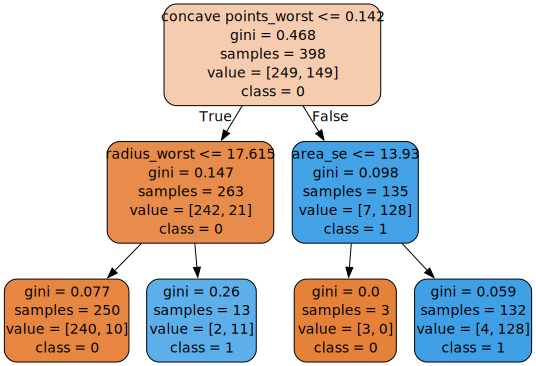

In [44]:
final_estimator = DecisionTreeClassifier(criterion='gini', random_state=1234, ccp_alpha=df['alpha'][0])
final_estimator.fit(x_train, y_train)
my_tree(final_estimator)